# TOR detection using Stream-Wise NetTiSA

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [2]:
df = pd.read_csv("binary.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,0,10.0.2.15.,82.161.239.177,11789,0,14196377,0,1.437495e+09,1.437495e+09,...,25704.002240,0.014613,0.370509,0.280602,-0.475738,20.752998,0.051836,-0.284888,1.000000,TOR_AUDIO
1,1,1,82.161.239.177.,10.0.2.15,6269,0,495614,0,1.437495e+09,1.437495e+09,...,18070.302201,0.014415,0.409004,0.296028,-0.344568,16.152675,0.055605,-0.402499,1.000000,TOR_AUDIO
2,2,2,10.0.2.15.,82.161.239.177,11207,0,13526839,0,1.437495e+09,1.437495e+09,...,13422.346822,0.007660,0.390990,0.304761,-0.457126,9.394153,0.059603,-0.667719,1.000000,TOR_AUDIO
3,3,3,82.161.239.177.,10.0.2.15,5939,0,478868,0,1.437495e+09,1.437495e+09,...,23325.960757,0.023553,0.408234,0.299550,-0.267777,15.232738,0.070569,-0.571564,1.000000,TOR_AUDIO
4,4,4,10.0.2.15.,82.161.239.177,5,0,1629,0,1.437495e+09,1.437495e+09,...,115028.640802,0.562139,0.499915,0.278680,NaN,257.861875,991.100508,-0.233831,0.016924,TOR_AUDIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120791,120791,119475,94.176.102.155,10.152.152.11,1,0,18,0,1.438012e+09,1.438012e+09,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,nonTOR_VOIP
120792,120792,119476,23.101.158.111.,10.152.152.11,12,0,1102,0,1.438012e+09,1.438012e+09,...,2089.287929,0.328904,0.609080,0.214714,0.669064,2.116961,3.532300,0.686195,0.008824,nonTOR_VOIP
120793,120793,119477,10.152.152.11.,23.101.158.111,12,0,3556,0,1.438012e+09,1.438012e+09,...,-1112.057842,0.314004,0.515637,0.291537,0.031810,1.365423,0.830852,0.401108,0.082597,nonTOR_VOIP
120794,120794,119478,91.190.218.212.,10.152.152.11,10,0,2621,0,1.438012e+09,1.438012e+09,...,9418.218693,0.661671,0.529467,0.282829,0.084577,1.550714,0.378417,0.686791,0.176098,nonTOR_VOIP


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes


for F in features:
    df.replace([np.inf], 0, inplace=True)
    df.replace([-np.inf], 0, inplace=True)
    df.loc[df[F].isnull(), F] = 0

In [6]:
df

,LABEL,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS,LABEL_code
0,TOR_AUDIO,11789,0,14196377,0,1264,416.145407,173177,-0.504632,60,1480,1420,32.922896,267,21.123418,1330.931284,6.788683,0.633387,186.786784,294.901456,0.025017,0.000000,35.543898,1.467255,1.0,0
1,TOR_AUDIO,6269,0,495614,0,139,192.657728,37117,0.161786,60,1117,1057,138.602682,135,97.122302,237.589376,5.400178,0.629204,185.553901,294.902490,0.047049,0.000000,35.543523,0.536694,1.0,0
2,TOR_AUDIO,11207,0,13526839,0,1266,415.198748,172391,-0.506068,60,1480,1420,32.796110,266,21.011058,1333.289968,6.813601,0.547053,163.881194,299.571058,0.026733,0.000000,45.360642,1.440835,1.0,0
3,TOR_AUDIO,5939,0,478868,0,140,193.571692,37470,0.160600,60,1117,1057,138.265494,136,97.142857,239.251682,5.082190,0.549039,164.497330,299.609362,0.050456,0.000020,45.360370,0.537555,1.0,0
4,TOR_AUDIO,5,0,1629,0,385,297.412172,88455,-0.128350,60,603,543,77.249915,260,67.532468,468.620742,0.743570,0.335437,13.079405,38.992125,9.748031,0.000709,30.103271,2.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120791,nonTOR_VOIP,1,0,18,0,78,78.000000,0,0.000000,78,78,0,100.000000,0,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,15
120792,nonTOR_VOIP,12,0,1102,0,151,199.341416,39738,0.137984,60,737,677,132.014183,126,83.443709,243.883852,6.299789,0.552390,1.618654,2.930274,0.266389,0.000037,1.538670,1.272727,1.0,15
120793,nonTOR_VOIP,12,0,3556,0,356,504.126968,254144,0.172215,60,1520,1460,141.608699,385,108.146067,599.949026,3.114487,0.618496,1.811749,2.929281,0.266298,0.000074,1.538359,1.454545,1.0,15
120794,nonTOR_VOIP,10,0,2621,0,322,500.448799,250449,0.216973,60,1520,1460,155.418882,360,111.801242,573.718834,3.546023,0.428410,0.644660,1.504772,0.167197,0.000051,0.667992,1.555556,1.0,15


In [7]:
df[["LABEL", "LABEL_code"]].drop_duplicates(keep='first')

,LABEL,LABEL_code
0,TOR_AUDIO,0
258,TOR_BROWSING,1
524,TOR_CHAT,2
636,TOR_FILE_TRANSFER,3
724,TOR_MAIL,4
762,TOR_P2P,5
986,TOR_VIDEO,6
1092,TOR_VOIP,7
1316,nonTOR_AUDIO,8
4756,nonTOR_BROWSING,9


In [8]:
df = df[["LABEL_code"] + features].copy()

In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [10]:
df.LABEL_code.value_counts()

13.0    59506
9.0     47547
8.0      3440
14.0     3380
11.0     3350
15.0     1199
10.0      603
12.0      455
1.0       266
0.0       258
5.0       224
7.0       224
2.0       112
6.0       106
3.0        88
4.0        38
Name: LABEL_code, dtype: int64

In [11]:
X = df[features]
y = df.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test

X_train['LABEL_code'] = y_train
df_features = X_train

X_test['LABEL_code'] = y_test
df_validation = X_test


# df_validation = df.sample(n = 10000)
# df_features =  df[~df.isin(df_validation)].dropna()

In [12]:
df_validation.size, df_features.size

(905975, 2113925)

In [13]:
df_features.LABEL_code.mask(df_features.LABEL_code >= 8, 8, inplace=True)
df_features.LABEL_code.mask(df_features.LABEL_code <= 7, 1, inplace=True)
df_features.LABEL_code.mask(df_features.LABEL_code == 8, 0, inplace=True)

df_validation.LABEL_code.mask(df_validation.LABEL_code >= 8, 8, inplace=True)
df_validation.LABEL_code.mask(df_validation.LABEL_code <= 7, 1, inplace=True)
df_validation.LABEL_code.mask(df_validation.LABEL_code == 8, 0, inplace=True)

In [14]:
df_features.LABEL_code.value_counts()

0.0    83635
1.0      922
Name: LABEL_code, dtype: int64

In [15]:
df_validation.LABEL_code.value_counts()

0.0    35845
1.0      394
Name: LABEL_code, dtype: int64

In [16]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [25]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), 
                        max_depth = int(space['max_depth']), 
                        gamma = space['gamma'],
                        reg_alpha = float(space['reg_alpha']),
                        reg_lambda = float(space['reg_lambda']),
                        min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=float(space['colsample_bytree']), 
                        base_score = float(space['base_score']),
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 75, 2),
        'gamma': hp.uniform ('gamma', 1,20),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 300, 20),
        'base_score' : hp.uniform('base_score', 0,1),
        
        # 'subsample': hp.quniform('subsample', 3, 40, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.5, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 1000,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [26]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 1000/1000 [26:37<00:00,  1.60s/trial, best loss: -0.935114503816794]  
The best hyperparameters are :  

{'base_score': 0.46391678990076807, 'colsample_bytree': 0.5403517172943159, 'gamma': 1.01220720468548, 'max_depth': 56.0, 'min_child_weight': 1.0, 'n_estimators': 100.0, 'reg_alpha': 0.0, 'reg_lambda': 0.5353991928179921}


In [21]:
def XGBoost_classification_tunned(best_hyperparams):
      X=df_features[features]  # Features
      y=df_features['LABEL_code']  # Labels
      # #Split on train and test
      # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
      
      model = XGBClassifier(
                        n_estimators = int(best_hyperparams['n_estimators']), 
                        max_depth = int(best_hyperparams['max_depth']), 
                        gamma = best_hyperparams['gamma'],
                        reg_alpha = float(best_hyperparams['reg_alpha']),
                        reg_lambda = float(best_hyperparams['reg_lambda']),
                        min_child_weight=int(best_hyperparams['min_child_weight']),
                        colsample_bytree=float(best_hyperparams['colsample_bytree']), 
                        base_score = float(best_hyperparams['base_score']),
      )
      model.fit(X, y)
      # model.fit(X_train, y_train)
      # y_pred = model.predict(X_test)
      
      # accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
      # precision = precision_score(y_test, y_pred)  * 100
      # recall = recall_score(y_test, y_pred)  * 100
      # F1 = f1_score(y_test, y_pred)  * 100
      # print("{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1))
      # matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      # plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

In [27]:
model = XGBoost_classification_tunned(best_hyperparams)

In [21]:

def while_XGBoost_classification_tunned(best_hyperparams, cycles=100, verbose=True):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best_results = (0,"",None,None, None, None, None, None, None)
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
        model = XGBClassifier(
                        n_estimators = int(best_hyperparams['n_estimators']), 
                        max_depth = int(best_hyperparams['max_depth']), 
                        gamma = best_hyperparams['gamma'],
                        reg_alpha = float(best_hyperparams['reg_alpha']),
                        reg_lambda = float(best_hyperparams['reg_lambda']),
                        min_child_weight=int(best_hyperparams['min_child_weight']),
                        colsample_bytree=float(best_hyperparams['colsample_bytree']), 
              )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
        precision = precision_score(y_test, y_pred)  * 100
        recall = recall_score(y_test, y_pred)  * 100
        F1 = f1_score(y_test, y_pred)  * 100
        if best_results[0] < F1:
            matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
            best_results = (F1, "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1), matrix, percentage_matrix, model, X_train, y_train, X_test, y_test)
    if verbose is True:
        print("")
        print("")
        print("")
        print(best_results[0])
        print(best_results[1])
        plot_confusion_matrix(best_results[2], best_results[3], model="XGBoost")
    return best_results[4], best_results[5], best_results[6], best_results[7], best_results[8]

In [22]:
# best_model, X_train, y_train, X_test, y_test = while_XGBoost_classification_tunned(best_hyperparams, cycles=25)

In [28]:
best_model = model

# Validation

\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.85 & 98.01 & 87.56 & 92.49 \\
\hline



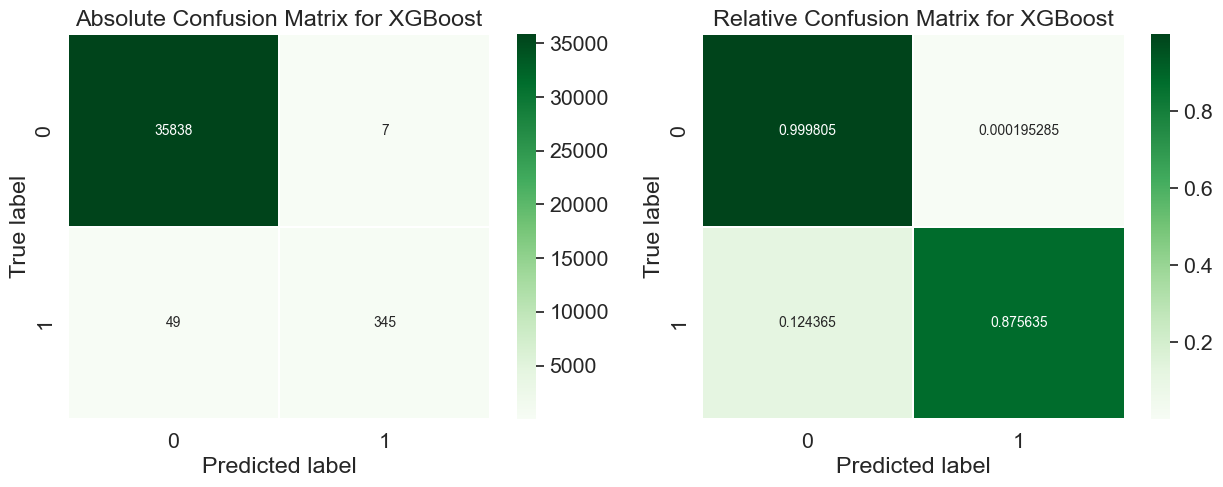

In [29]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels


y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

## Feature importance

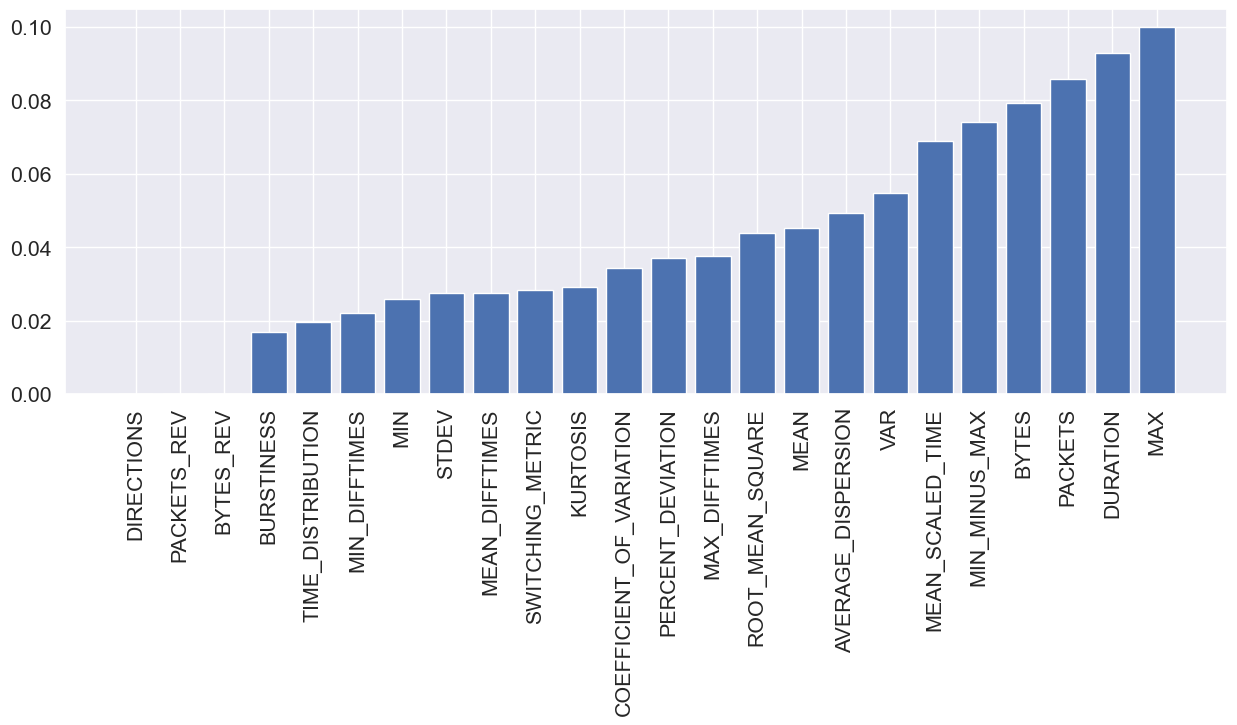

In [25]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [26]:
feat_importances.to_dict()

{'DIRECTIONS': 0.0,
 'PACKETS_REV': 0.0,
 'BYTES_REV': 0.0,
 'BURSTINESS': 0.016897810623049736,
 'TIME_DISTRIBUTION': 0.019725320860743523,
 'MIN_DIFFTIMES': 0.022131774574518204,
 'MIN': 0.02586362138390541,
 'STDEV': 0.02749994397163391,
 'MEAN_DIFFTIMES': 0.027626706287264824,
 'SWITCHING_METRIC': 0.02829275093972683,
 'KURTOSIS': 0.02926737256348133,
 'COEFFICIENT_OF_VARIATION': 0.0343167781829834,
 'PERCENT_DEVIATION': 0.037064358592033386,
 'MAX_DIFFTIMES': 0.03759278357028961,
 'ROOT_MEAN_SQUARE': 0.04377589002251625,
 'MEAN': 0.04511834308505058,
 'AVERAGE_DISPERSION': 0.04934855177998543,
 'VAR': 0.05464491993188858,
 'MEAN_SCALED_TIME': 0.06884398311376572,
 'MIN_MINUS_MAX': 0.07418867200613022,
 'BYTES': 0.07918452471494675,
 'PACKETS': 0.08577395975589752,
 'DURATION': 0.09294486790895462,
 'MAX': 0.09989701211452484}